In [56]:
import pandas as pd
import pickle
import numpy as np
import time
import torch
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [4]:
data_path = 'mathorcup_recom_listwise/data/'

In [31]:
with open(data_path + 'userID2idx.pickle', 'rb') as handle:
    userID2idx = pickle.load(handle)
with open(data_path + 'contentID2idx.pickle', 'rb') as handle:
    contentID2idx = pickle.load(handle)
with open(data_path + 'idx2key.pickle', 'rb') as handle:
    idx2key = pickle.load(handle)
len(idx2key)

1485

In [34]:
idx2key[4]

'v两性/两性健康,健康/其他'

In [30]:
idx

'0699427'

In [38]:
userID = '1424832354'
idx = userID2idx[userID]
aaa, bb, cc = idx[0:3], idx[3:5], idx[5:7]
df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc), dtype=str)
edge_weight_dict = {}

for s in df.sequence:
    temp = s.split(';') + ['EOF']
    for icd1, icd2 in zip(temp, temp[1:]):
        i1, c1, d1 = icd1.split(':')
        contentIdx1 = contentID2idx[i1]
        TC1 = idx2key[contentIdx1]
        if icd2 != 'EOF':
            i2, c2, d2 = icd2.split(':')
            contentIdx2 = contentID2idx[i2]
            TC2 = idx2key[contentIdx2]
            edge_weight_dict[(TC1, TC2)] = edge_weight_dict.get((TC1, TC2), 0) + 1
        else:
            edge_weight_dict[(TC1, 'EOF')] = edge_weight_dict.get((TC1, 'EOF'), 0) + 1
print(len(edge_weight_dict))

675


In [43]:
edge_weight_dict_sparse = {k: v for k, v in edge_weight_dict.items() if v > 1}
print(len(edge_weight_dict_sparse))

85


In [50]:
len(edge_weight_dict_sparse)

85

In [49]:
ebunch_to_add = [(k[0], k[1], v) for k, v in edge_weight_dict_sparse.items()]
len(ebunch_to_add)

85

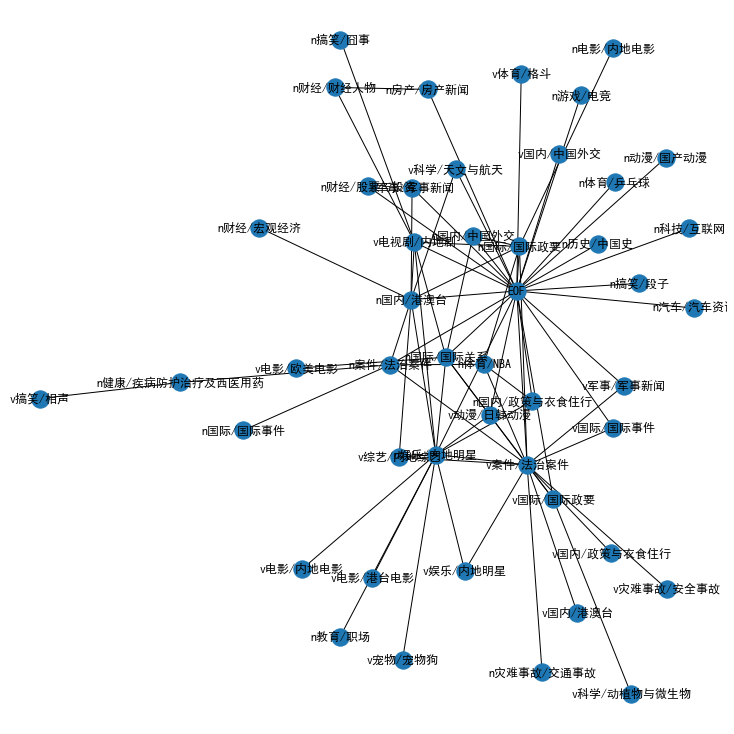

In [72]:
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.add_weighted_edges_from.html
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_weighted_edges_from(ebunch_to_add=ebunch_to_add)
fig = plt.figure(1, figsize=(10, 10))
nx.draw(G, with_labels=True, arrows=True, font_family='SimHei')#, pos=nx.circular_layout(G))